In [114]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import cohen_kappa_score
import graphviz
from sklearn.linear_model import LogisticRegression

In [4]:
org_df=pd.read_csv("C:/Users/DELL-LH2018/Desktop/Aly6040/assignment1/aly6040dataset.csv")
org_df=pd.DataFrame(org_df)
org_df.head()

customer_ID  shopping_pt  record_type  day   time state  location  \
0     10000001            1            0    1  12:35    OK   10002.0   
1     10000001            2            0    1  12:36    OK   10002.0   
2     10000002            1            0    4  12:19    PA   10003.0   
3     10000002            2            0    4  12:21    PA   10003.0   
4     10000003            1            0    3  17:12    AR   10004.0   

   group_size  homeowner  car_age  ... C_previous  duration_previous  A  B  C  \
0           1          0        9  ...        3.0                9.0  0  0  1   
1           1          0        9  ...        3.0                9.0  2  1  1   
2           1          1        7  ...        2.0               15.0  2  0  2   
3           1          1        7  ...        2.0               15.0  2  0  2   
4           1          0        4  ...        3.0                1.0  1  0  1   

   D  E  F  G  cost  
0  1  0  0  4   543  
1  3  1  3  2   611  
2  3  1  2  2   691  
3  3  1  2  2   695  
4  1  0  2  2   628  

[5 rows x 25 columns]

# EDA

In [5]:
#Columns are there in the dataset
org_df.columns

Index(['customer_ID', 'shopping_pt', 'record_type', 'day', 'time', 'state',
       'location', 'group_size', 'homeowner', 'car_age', 'car_value',
       'risk_factor', 'age_oldest', 'age_youngest', 'married_couple',
       'C_previous', 'duration_previous', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'cost'],
      dtype='object')

In [6]:
# Number of columns and rows
org_df.shape

(198856, 25)

In [7]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198856 entries, 0 to 198855
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_ID        198856 non-null  int64  
 1   shopping_pt        198856 non-null  int64  
 2   record_type        198856 non-null  int64  
 3   day                198856 non-null  int64  
 4   time               198856 non-null  object 
 5   state              198856 non-null  object 
 6   location           198178 non-null  float64
 7   group_size         198856 non-null  int64  
 8   homeowner          198856 non-null  int64  
 9   car_age            198856 non-null  int64  
 10  car_value          198117 non-null  object 
 11  risk_factor        123369 non-null  float64
 12  age_oldest         198856 non-null  int64  
 13  age_youngest       198856 non-null  int64  
 14  married_couple     198856 non-null  int64  
 15  C_previous         189087 non-null  float64
 16  du

In [8]:
new_df = org_df.copy()
na_num=new_df.isna().sum()#check null value
na_num

customer_ID              0
shopping_pt              0
record_type              0
day                      0
time                     0
state                    0
location               678
group_size               0
homeowner                0
car_age                  0
car_value              739
risk_factor          75487
age_oldest               0
age_youngest             0
married_couple           0
C_previous            9769
duration_previous     9769
A                        0
B                        0
C                        0
D                        0
E                        0
F                        0
G                        0
cost                     0
dtype: int64

In [9]:
#the location we cannot predict, so just delete the rows
new_df=new_df.dropna(subset=['location'])

In [10]:
na_num2= new_df.isna().sum()
na_num2

customer_ID              0
shopping_pt              0
record_type              0
day                      0
time                     0
state                    0
location                 0
group_size               0
homeowner                0
car_age                  0
car_value              739
risk_factor          75183
age_oldest               0
age_youngest             0
married_couple           0
C_previous            9769
duration_previous     9769
A                        0
B                        0
C                        0
D                        0
E                        0
F                        0
G                        0
cost                     0
dtype: int64

In [11]:
# one-hot encoding for car_value (Sparse matrix)
dummies_df = pd.get_dummies(new_df['car_value'],sparse= True)
dummies_trans= dummies_df.sparse.to_dense()
dummies_trans.head()

a  b  c  d  e  f  g  h  i
0  0  0  0  0  0  1  0  0  0
1  0  0  0  0  0  1  0  0  0
2  0  0  0  0  0  1  0  0  0
3  0  0  0  0  0  1  0  0  0
4  0  0  0  1  0  0  0  0  0

In [12]:
#conbine the dummy variables into one
dummies_trans=pd.DataFrame(dummies_trans)
dummies_trans=dummies_trans.applymap(str)
dummies_trans['dummy_car_value']=dummies_trans['a']+dummies_trans['b']+ dummies_trans['c']+ dummies_trans['d']+ dummies_trans['e']+ dummies_trans['f']+ dummies_trans['g']+ dummies_trans['h']+ dummies_trans['i']
dummies_trans

a  b  c  d  e  f  g  h  i dummy_car_value
0       0  0  0  0  0  1  0  0  0       000001000
1       0  0  0  0  0  1  0  0  0       000001000
2       0  0  0  0  0  1  0  0  0       000001000
3       0  0  0  0  0  1  0  0  0       000001000
4       0  0  0  1  0  0  0  0  0       000100000
...    .. .. .. .. .. .. .. .. ..             ...
198851  0  0  0  0  0  1  0  0  0       000001000
198852  0  0  0  0  0  1  0  0  0       000001000
198853  0  0  0  1  0  0  0  0  0       000100000
198854  0  0  0  1  0  0  0  0  0       000100000
198855  0  0  0  1  0  0  0  0  0       000100000

[198178 rows x 10 columns]

In [13]:
#000000000 transform to nan
dummies_trans=dummies_trans.replace('000000000',np.nan)
na_num3= dummies_trans.isna().sum()
na_num3

a                    0
b                    0
c                    0
d                    0
e                    0
f                    0
g                    0
h                    0
i                    0
dummy_car_value    739
dtype: int64

In [14]:
#conbine the final table to do knn
new_df=pd.concat([new_df, dummies_trans['dummy_car_value']], axis=1)
na_num4= new_df.isna().sum()
na_num4

customer_ID              0
shopping_pt              0
record_type              0
day                      0
time                     0
state                    0
location                 0
group_size               0
homeowner                0
car_age                  0
car_value              739
risk_factor          75183
age_oldest               0
age_youngest             0
married_couple           0
C_previous            9769
duration_previous     9769
A                        0
B                        0
C                        0
D                        0
E                        0
F                        0
G                        0
cost                     0
dummy_car_value        739
dtype: int64

In [15]:
knn_df= new_df
knn_df=knn_df.drop(columns=['time','state','car_value'])
knn_df.head()

customer_ID  shopping_pt  record_type  day  location  group_size  \
0     10000001            1            0    1   10002.0           1   
1     10000001            2            0    1   10002.0           1   
2     10000002            1            0    4   10003.0           1   
3     10000002            2            0    4   10003.0           1   
4     10000003            1            0    3   10004.0           1   

   homeowner  car_age  risk_factor  age_oldest  ...  duration_previous  A  B  \
0          0        9          NaN          24  ...                9.0  0  0   
1          0        9          NaN          24  ...                9.0  2  1   
2          1        7          NaN          74  ...               15.0  2  0   
3          1        7          NaN          74  ...               15.0  2  0   
4          0        4          4.0          26  ...                1.0  1  0   

   C  D  E  F  G  cost  dummy_car_value  
0  1  1  0  0  4   543        000001000  
1  1  3  1  3  2   611        000001000  
2  2  3  1  2  2   691        000001000  
3  2  3  1  2  2   695        000001000  
4  1  1  0  2  2   628        000100000  

[5 rows x 23 columns]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#To make sure which k value is the best for us to use
# DON'T RUN THIS!!!!! It will take about three hours to finish ^.^ 

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=knn_df.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

k_errors = optimize_k(data=knn_df, target='risk_factor')

In [17]:
k_errors
# k = 19 has the smallest RMSE, and there is little change in the surrounding RMSE.
#So we choose 19 as the k

[{'K': 1, 'RMSE': 0.6113867108985906},
 {'K': 3, 'RMSE': 0.588041606478162},
 {'K': 5, 'RMSE': 0.5661417437475558},
 {'K': 7, 'RMSE': 0.5456056202818994},
 {'K': 9, 'RMSE': 0.5314470642184734},
 {'K': 11, 'RMSE': 0.5205139046188516},
 {'K': 13, 'RMSE': 0.514094851543669},
 {'K': 15, 'RMSE': 0.5086667040646541},
 {'K': 17, 'RMSE': 0.5047605089816991},
 {'K': 19, 'RMSE': 0.5006334861012239}]

In [17]:
#knn imputation
knn_imputer = KNNImputer(n_neighbors=19)
after_imputation = knn_imputer.fit_transform(knn_df)

In [92]:
#check the nan 
df1=after_imputation
df2=pd.DataFrame(df1,columns = ['customer_ID', 'shopping_pt', 'record_type', 'day',
       'location', 'group_size', 'homeowner', 'car_age',
      'risk_factor', 'age_oldest', 'age_youngest', 'married_couple',
       'C_previous', 'duration_previous', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'cost','dummy_car_value']) # the result is the np.array
na_num5= df2.isna().sum() #recheck missing value
na_num5

customer_ID          0
shopping_pt          0
record_type          0
day                  0
location             0
group_size           0
homeowner            0
car_age              0
risk_factor          0
age_oldest           0
age_youngest         0
married_couple       0
C_previous           0
duration_previous    0
A                    0
B                    0
C                    0
D                    0
E                    0
F                    0
G                    0
cost                 0
dummy_car_value      0
dtype: int64

In [94]:
#transform the dummy variable to the 'car_value'
df2.loc[df2['dummy_car_value'] == 1, 'dummy_car_value'] = 'i'
df2.loc[df2['dummy_car_value'] == 10, 'dummy_car_value'] = 'h'
df2.loc[df2['dummy_car_value'] == 100, 'dummy_car_value'] = 'g'
df2.loc[df2['dummy_car_value'] == 1000, 'dummy_car_value'] = 'f'
df2.loc[df2['dummy_car_value'] == 10000, 'dummy_car_value'] = 'e'
df2.loc[df2['dummy_car_value'] == 100000, 'dummy_car_value'] = 'd'
df2.loc[df2['dummy_car_value'] == 1000000, 'dummy_car_value'] = 'c'
df2.loc[df2['dummy_car_value'] == 10000000, 'dummy_car_value'] = 'b'
df2.loc[df2['dummy_car_value'] == 100000000, 'dummy_car_value'] = 'a'

#get the cleaned final dataset
new_df=new_df.reset_index()
df=pd.concat([df2, new_df['time'],new_df['state']], axis=1)
df['dummy_car_value']=df['dummy_car_value'].astype(str)
df=df.drop(df[df['dummy_car_value'].map(len)>1].index)
df

customer_ID  shopping_pt  record_type  day  location  group_size  \
0        10000001.0          1.0          0.0  1.0   10002.0         1.0   
1        10000001.0          2.0          0.0  1.0   10002.0         1.0   
2        10000002.0          1.0          0.0  4.0   10003.0         1.0   
3        10000002.0          2.0          0.0  4.0   10003.0         1.0   
4        10000003.0          1.0          0.0  3.0   10004.0         1.0   
...             ...          ...          ...  ...       ...         ...   
198173   10152719.0          5.0          0.0  4.0   12128.0         1.0   
198174   10152719.0          6.0          0.0  4.0   12128.0         1.0   
198175   10152722.0          1.0          0.0  3.0   14561.0         1.0   
198176   10152722.0          2.0          0.0  3.0   14561.0         1.0   
198177   10152722.0          3.0          0.0  3.0   14561.0         1.0   

        homeowner  car_age  risk_factor  age_oldest  ...    B    C    D    E  \
0             0.0      9.0     2.842105        24.0  ...  0.0  1.0  1.0  0.0   
1             0.0      9.0     2.789474        24.0  ...  1.0  1.0  3.0  1.0   
2             1.0      7.0     2.736842        74.0  ...  0.0  2.0  3.0  1.0   
3             1.0      7.0     2.736842        74.0  ...  0.0  2.0  3.0  1.0   
4             0.0      4.0     4.000000        26.0  ...  0.0  1.0  1.0  0.0   
...           ...      ...          ...         ...  ...  ...  ...  ...  ...   
198173        1.0      3.0     3.000000        58.0  ...  0.0  4.0  3.0  1.0   
198174        1.0      3.0     1.000000        58.0  ...  0.0  4.0  3.0  1.0   
198175        1.0     22.0     3.000000        75.0  ...  1.0  3.0  3.0  1.0   
198176        1.0     22.0     3.000000        75.0  ...  1.0  3.0  3.0  1.0   
198177        1.0     22.0     3.000000        75.0  ...  1.0  3.0  3.0  0.0   

          F    G   cost  dummy_car_value   time  state  
0       0.0  4.0  543.0                f  12:35     OK  
1       3.0  2.0  611.0                f  12:36     OK  
2       2.0  2.0  691.0                f  12:19     PA  
3       2.0  2.0  695.0                f  12:21     PA  
4       2.0  2.0  628.0                d  17:12     AR  
...     ...  ...    ...              ...    ...    ...  
198173  0.0  2.0  657.0                f  11:58     NY  
198174  0.0  2.0  664.0                f  11:59     NY  
198175  1.0  3.0  600.0                d  15:18     OH  
198176  1.0  3.0  594.0                d  15:18     OH  
198177  0.0  3.0  568.0                d  15:19     OH  

[197441 rows x 25 columns]

In [95]:
df.columns

Index(['customer_ID', 'shopping_pt', 'record_type', 'day', 'location',
       'group_size', 'homeowner', 'car_age', 'risk_factor', 'age_oldest',
       'age_youngest', 'married_couple', 'C_previous', 'duration_previous',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'cost', 'dummy_car_value', 'time',
       'state'],
      dtype='object')

In [2]:
# importing libraries  
import os
##import bamboolib as bam
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

<AxesSubplot:xlabel='car_value', ylabel='count'>

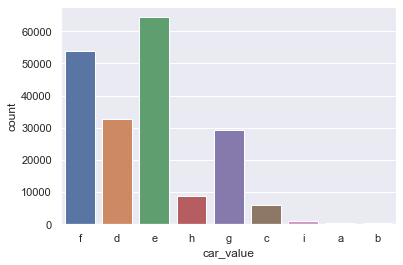

In [16]:
#check the distribution of the car_value
df.rename(columns={'dummy_car_value':'car_value'}, inplace = True)
sns.countplot(df['csar_value'])

In [5]:
df.nunique()

Unnamed: 0           197441
customer_ID           55403
shopping_pt              11
record_type               1
day                       7
location               6028
group_size                4
homeowner                 2
car_age                  57
risk_factor              58
age_oldest               58
age_youngest             60
married_couple            2
C_previous               58
duration_previous       222
A                         3
B                         2
C                         4
D                         3
E                         2
F                         4
G                         4
cost                    428
dummy_car_value           9
time                   1045
state                    36
dtype: int64

<AxesSubplot:xlabel='age_youngest'>

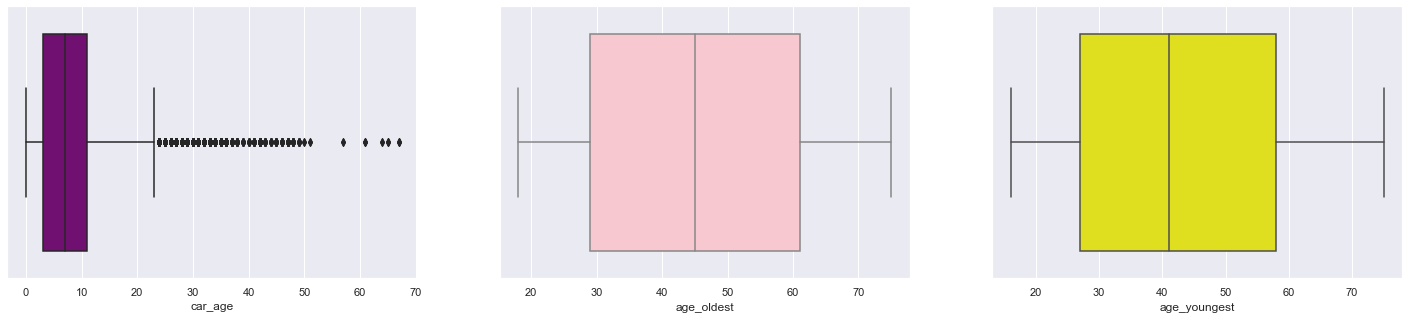

In [6]:
#boxplot for car age, age oldest and age youngest
_,axss = plt.subplots(1,3, figsize=[25,5])
sns.boxplot(df['car_age'], ax=axss[0], color = "purple")
sns.boxplot(df['age_oldest'], ax=axss[1], color = "pink")
sns.boxplot(df['age_youngest'], ax=axss[2], color = "yellow")

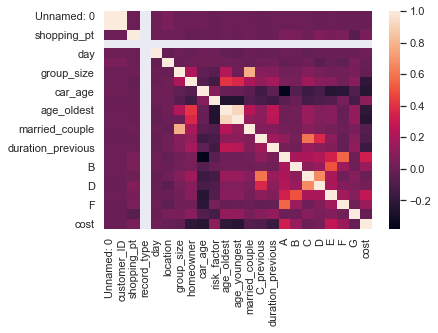

In [17]:
# Build a correlation heatmap for all variables in the dataset
corrMatrix = df.corr()
sns.heatmap(corrMatrix)
plt.show()

In [10]:
#Check pairwise Peason correlation Coeffients
corr_score = df[['car_age','age_oldest','age_youngest']].corr()
corr_score = corr_score.reset_index()
corr_score

index   car_age  age_oldest  age_youngest
0       car_age  1.000000   -0.009678     -0.012895
1    age_oldest -0.009678    1.000000      0.920940
2  age_youngest -0.012895    0.920940      1.000000

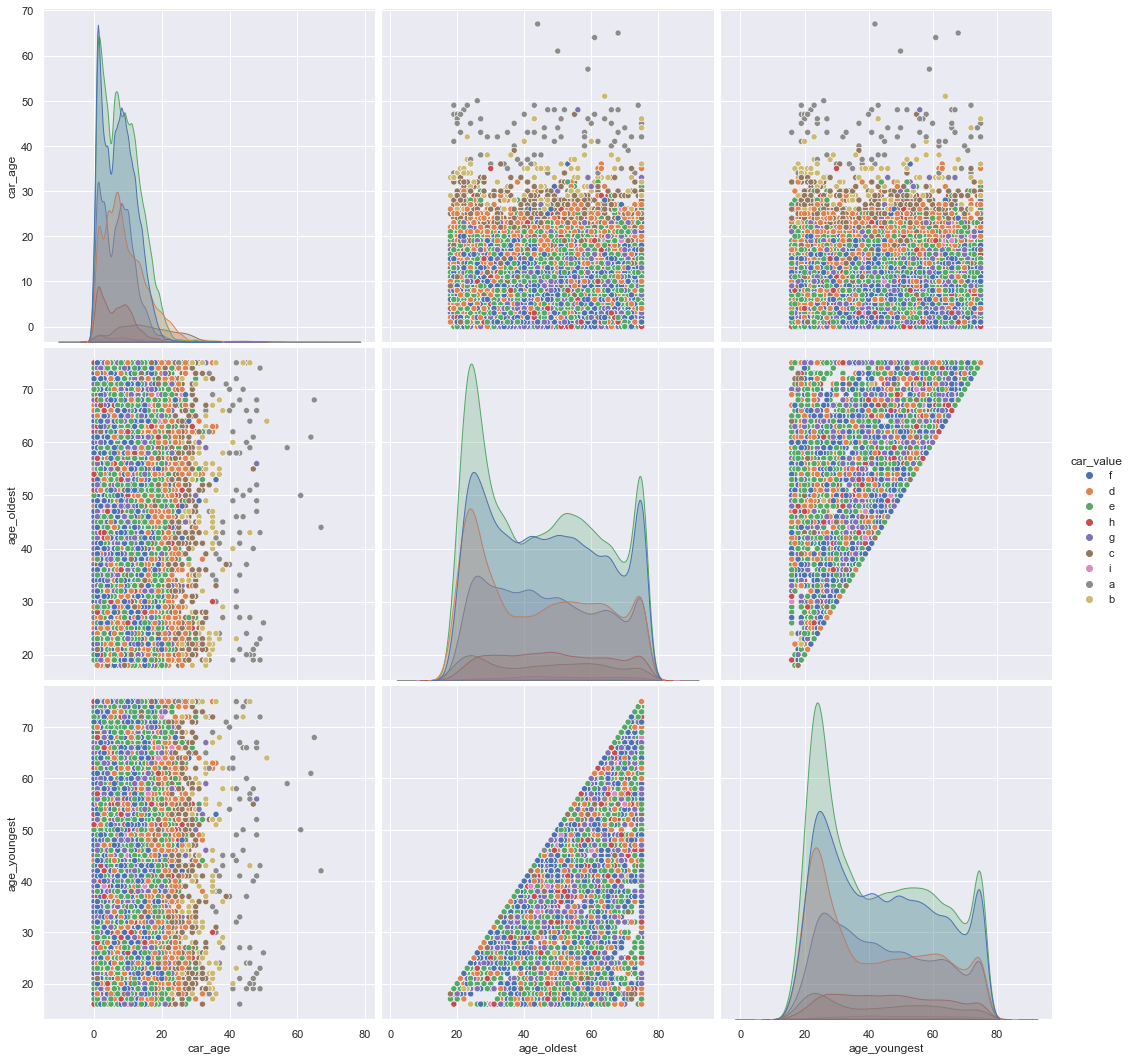

In [18]:
#display the skewness and kurtosis of each variable.
sns.set()
cols = ['car_age','age_oldest','age_youngest','car_value']
sns.pairplot(df[cols],size = 5, hue= "car_value")
plt.show();

<AxesSubplot:xlabel='car_value', ylabel='count'>

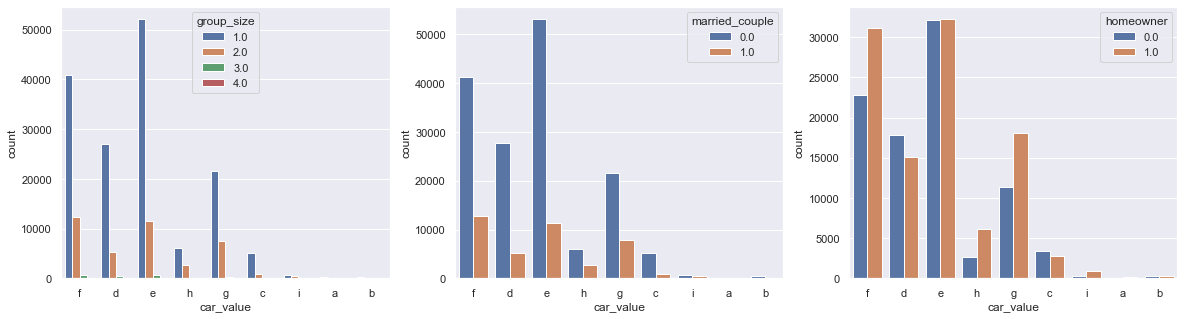

In [19]:
#understand categorical feature and check the inbalance of that.
#exclude the car age, age oldest, age youngest because they have too many classes.
_,axss = plt.subplots(1,3, figsize=[20,5])
sns.countplot(x='car_value', hue = 'group_size', data =df, ax =axss[0])
sns.countplot(x='car_value', hue = 'married_couple', data =df, ax =axss[1])
sns.countplot(x='car_value', hue = 'homeowner', data =df, ax =axss[2])

# data preprocessing/manipulation

In [18]:
ori_df=df
ori_df.head()

Unnamed: 0  customer_ID  shopping_pt  record_type  day  location  \
0           0     10000001            1            0    1     10002   
1           1     10000001            2            0    1     10002   
2           2     10000002            1            0    4     10003   
3           3     10000002            2            0    4     10003   
4           4     10000003            1            0    3     10004   

   group_size  homeowner  car_age  risk_factor  ...  B  C  D  E  F  G  cost  \
0           1          0        9     2.842105  ...  0  1  1  0  0  4   543   
1           1          0        9     2.789474  ...  1  1  3  1  3  2   611   
2           1          1        7     2.736842  ...  0  2  3  1  2  2   691   
3           1          1        7     2.736842  ...  0  2  3  1  2  2   695   
4           1          0        4     4.000000  ...  0  1  1  0  2  2   628   

   dummy_car_value   time  state  
0                f  12:35     OK  
1                f  12:36     OK  
2                f  12:19     PA  
3                f  12:21     PA  
4                d  17:12     AR  

[5 rows x 26 columns]

In [19]:
ori_df=ori_df.sample(n=8000)

In [20]:
ori_df.nunique()

Unnamed: 0           8000
customer_ID          7480
shopping_pt            11
record_type             1
day                     7
location             3648
group_size              4
homeowner               2
car_age                42
risk_factor            56
age_oldest             58
age_youngest           60
married_couple          2
C_previous             46
duration_previous     157
A                       3
B                       2
C                       4
D                       3
E                       2
F                       4
G                       4
cost                  299
dummy_car_value         9
time                  754
state                  36
dtype: int64

In [21]:
#data preprocessing
#delete some useless variables
ori_df=ori_df.drop(["time"],axis=1)
ori_df=ori_df.drop(["Unnamed: 0"],axis=1)
ori_df=ori_df.drop(["record_type"],axis=1)
ori_df=ori_df.drop(["customer_ID"],axis=1)
ori_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 173328 to 50830
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shopping_pt        8000 non-null   int64  
 1   day                8000 non-null   int64  
 2   location           8000 non-null   int64  
 3   group_size         8000 non-null   int64  
 4   homeowner          8000 non-null   int64  
 5   car_age            8000 non-null   int64  
 6   risk_factor        8000 non-null   float64
 7   age_oldest         8000 non-null   int64  
 8   age_youngest       8000 non-null   int64  
 9   married_couple     8000 non-null   int64  
 10  C_previous         8000 non-null   float64
 11  duration_previous  8000 non-null   float64
 12  A                  8000 non-null   int64  
 13  B                  8000 non-null   int64  
 14  C                  8000 non-null   int64  
 15  D                  8000 non-null   int64  
 16  E                 

In [23]:
#data manipulation: tranform object to categorical to numeric
ori_df.rename(columns={'dummy_car_value':'car_value'}, inplace = True)
model_df = ori_df
model_df[['car_value','state']] = model_df[['car_value','state']].astype('category')
le=LabelEncoder()
model_df[['car_value','state']] = model_df[['car_value','state']].apply(le.fit_transform)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 173328 to 50830
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shopping_pt        8000 non-null   int64  
 1   day                8000 non-null   int64  
 2   location           8000 non-null   int64  
 3   group_size         8000 non-null   int64  
 4   homeowner          8000 non-null   int64  
 5   car_age            8000 non-null   int64  
 6   risk_factor        8000 non-null   float64
 7   age_oldest         8000 non-null   int64  
 8   age_youngest       8000 non-null   int64  
 9   married_couple     8000 non-null   int64  
 10  C_previous         8000 non-null   float64
 11  duration_previous  8000 non-null   float64
 12  A                  8000 non-null   int64  
 13  B                  8000 non-null   int64  
 14  C                  8000 non-null   int64  
 15  D                  8000 non-null   int64  
 16  E                 

In [24]:
model_df.head()

shopping_pt  day  location  group_size  homeowner  car_age  \
173328            3    2     13648           1          0        5   
77559             3    2     10597           1          0        2   
83578             2    0     12792           1          0        4   
96707             3    2     11232           1          0        6   
154285            2    1     12586           2          1        4   

        risk_factor  age_oldest  age_youngest  married_couple  ...  A  B  C  \
173328     2.421053          35            35               0  ...  1  0  1   
77559      2.000000          74            74               0  ...  1  1  3   
83578      2.210526          22            22               0  ...  1  0  3   
96707      2.105263          75            75               0  ...  0  0  1   
154285     1.000000          59            58               1  ...  2  0  3   

        D  E  F  G  cost  car_value  state  
173328  3  1  2  1   671          5     28  
77559   3  0  2  2   592          3      9  
83578   3  0  0  1   761          7      3  
96707   1  0  0  1   628          3      3  
154285  3  0  0  1   659          4     23  

[5 rows x 22 columns]

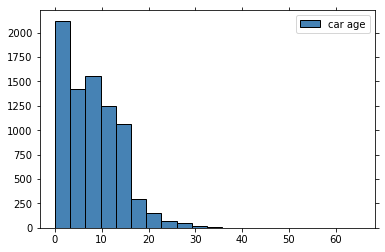

In [25]:
# Check the distribution of the variable with highest correlation with product A
plt.hist(model_df.car_age, 
        bins = 20,
        color = 'steelblue',
        edgecolor = 'k',
        label = 'car age' )
plt.tick_params(top='off', right='off')
plt.legend()
plt.show()

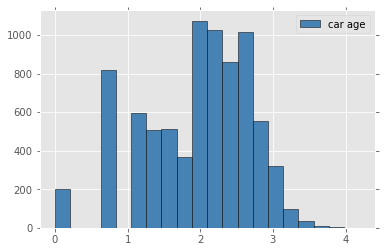

In [26]:
import matplotlib.pyplot as plt
model_df["car_age"] = model_df["car_age"].apply(np.log1p)
plt.style.use('ggplot')
plt.hist(model_df.car_age, 
        bins = 20,
        color = 'steelblue',
        edgecolor = 'k',
        label = 'car age' )
plt.tick_params(top='off', right='off')
plt.legend()
plt.show()

In [27]:
#We want to predict the categories and quantities of different products purchased by users
#Choose A product for the example:
model_df=model_df.drop(['B','C','D','E','F','G','cost'],axis=1)

#split dataset into train set and test set
X= model_df.drop(['A'], axis=1)
y= model_df['A']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50,stratify=y)
X_train.shape, X_test.shape

((6400, 14), (1600, 14))

In [28]:
model_df.columns

Index(['shopping_pt', 'day', 'location', 'group_size', 'homeowner', 'car_age',
       'risk_factor', 'age_oldest', 'age_youngest', 'married_couple',
       'C_previous', 'duration_previous', 'A', 'car_value', 'state'],
      dtype='object')

In [29]:
# balance the training set
model_df.A.value_counts()

1    5092
0    1837
2    1071
Name: A, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [31]:
y_train.value_counts()

0    4074
1    4074
2    4074
Name: A, dtype: int64

In [33]:
#trial
trial=pd.read_csv("C:/Users/DELL-LH2018/Desktop/Aly6040/assignment1/aly6040dataset_cleaned.csv")
df_train=trial
df_train=df_train.drop(["time"],axis=1)
df_train=df_train.drop(["Unnamed: 0"],axis=1)
df_train=df_train.drop(["record_type"],axis=1)
df_train=df_train.drop(["customer_ID"],axis=1)
df_train.rename(columns={'dummy_car_value':'car_value'}, inplace = True)
df_train[['car_value','state']] = df_train[['car_value','state']].astype('category')
le=LabelEncoder()
df_train[['car_value','state']] = df_train[['car_value','state']].apply(le.fit_transform)
df_train["car_age"] = df_train["car_age"].apply(np.log1p)

df_train=df_train.drop(['B','C','D','E','F','G','cost'],axis=1)

#split dataset into train set and test set
X2= df_train.drop(['A'], axis=1)
y2= df_train['A']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.8, random_state=50)

X_train2, y_train2 = sm.fit_sample(X_train2, y_train2)

In [34]:
#Creating helper functions to evaluate model performance 
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(X_test)))

In [35]:
def evaluate_model2(classifier2):
    print("Train Accuracy :", accuracy_score(y_train2, classifier2.predict(X_train2)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train2, classifier2.predict(X_train2)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test2, classifier2.predict(X_test2)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test2, classifier2.predict(X_test2)))

# Models- Logistic Regression

In [127]:
#Logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train2, y_train2.values.reshape(-1))
y_pred = logreg.predict(X_test2)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
logreg.score(X_test2, y_test2)

0.4415913292309251

In [129]:
print('accuracy of training set: {:.2f}'.format(logreg.score(X_test2, y_test2)))

accuracy of training set: 0.44


In [130]:
print('Train/Test split results:')
print("accuracy %2.3f" % accuracy_score(y_test2, y_pred))

Train/Test split results:
accuracy 0.442


In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.53      0.41      8818
           1       0.70      0.43      0.53     25474
           2       0.18      0.35      0.24      5197

    accuracy                           0.44     39489
   macro avg       0.41      0.44      0.39     39489
weighted avg       0.55      0.44      0.47     39489



In [132]:
#feature importance graph for logistic regression
from sklearn.datasets import make_classification

importance = logreg.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.08604
Feature: 1, Score: -0.01841
Feature: 2, Score: 0.00005
Feature: 3, Score: -0.01342
Feature: 4, Score: -0.02987
Feature: 5, Score: 0.22373
Feature: 6, Score: 0.03870
Feature: 7, Score: 0.01197
Feature: 8, Score: 0.00242
Feature: 9, Score: -0.01316
Feature: 10, Score: -0.10486
Feature: 11, Score: -0.08577
Feature: 12, Score: -0.17723
Feature: 13, Score: -0.00319


In [133]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

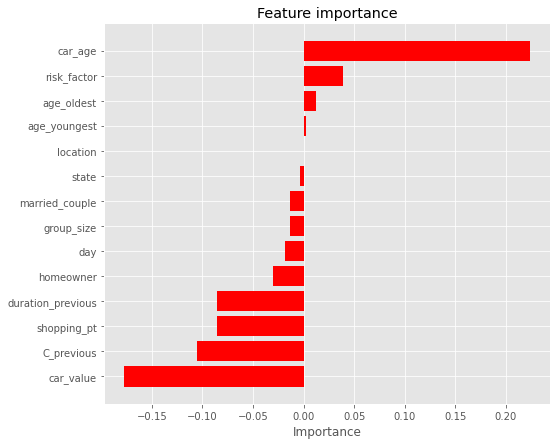

In [134]:
features_list = X.columns.values
feature_importance = importance
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

# Models- Decision Tree

In [36]:
#Decision Tree: 

dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [3, 5, 7, 9, 11, 15, 19],
    'min_samples_leaf': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,150,200],
    'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'criterion': ["gini", "entropy"]
}

model = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [37]:
%%time
model.fit(X_train, y_train)

Fitting 5 folds for each of 5852 candidates, totalling 29260 fits
Wall time: 4min 6s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 15, 19],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [38]:
model_dt=model.best_estimator_
model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=20,
                       min_samples_leaf=5, random_state=42)

In [39]:
evaluate_model(model_dt)

Train Accuracy : 0.628211422025855
Train Confusion Matrix:
[[2624  780  670]
 [ 656 2574  844]
 [ 512 1082 2480]]
--------------------------------------------------
Test Accuracy : 0.5725
Test Confusion Matrix:
[[224 110  34]
 [164 643 211]
 [ 15 150  49]]


In [40]:
#use the whole dataset to train on big data and test the accuracy
model_dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=20,
                       min_samples_leaf=200, random_state=42)

In [41]:
%%time
model_dt2.fit(X_train2,y_train2)

Wall time: 1.39 s


DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=20,
                       min_samples_leaf=200, random_state=42)

In [42]:
evaluate_model(model_dt2)

Train Accuracy : 0.5913925707740141
Train Confusion Matrix:
[[2771  744  559]
 [ 921 2345  808]
 [ 690 1272 2112]]
--------------------------------------------------
Test Accuracy : 0.573125
Test Confusion Matrix:
[[246 103  19]
 [212 617 189]
 [ 34 126  54]]


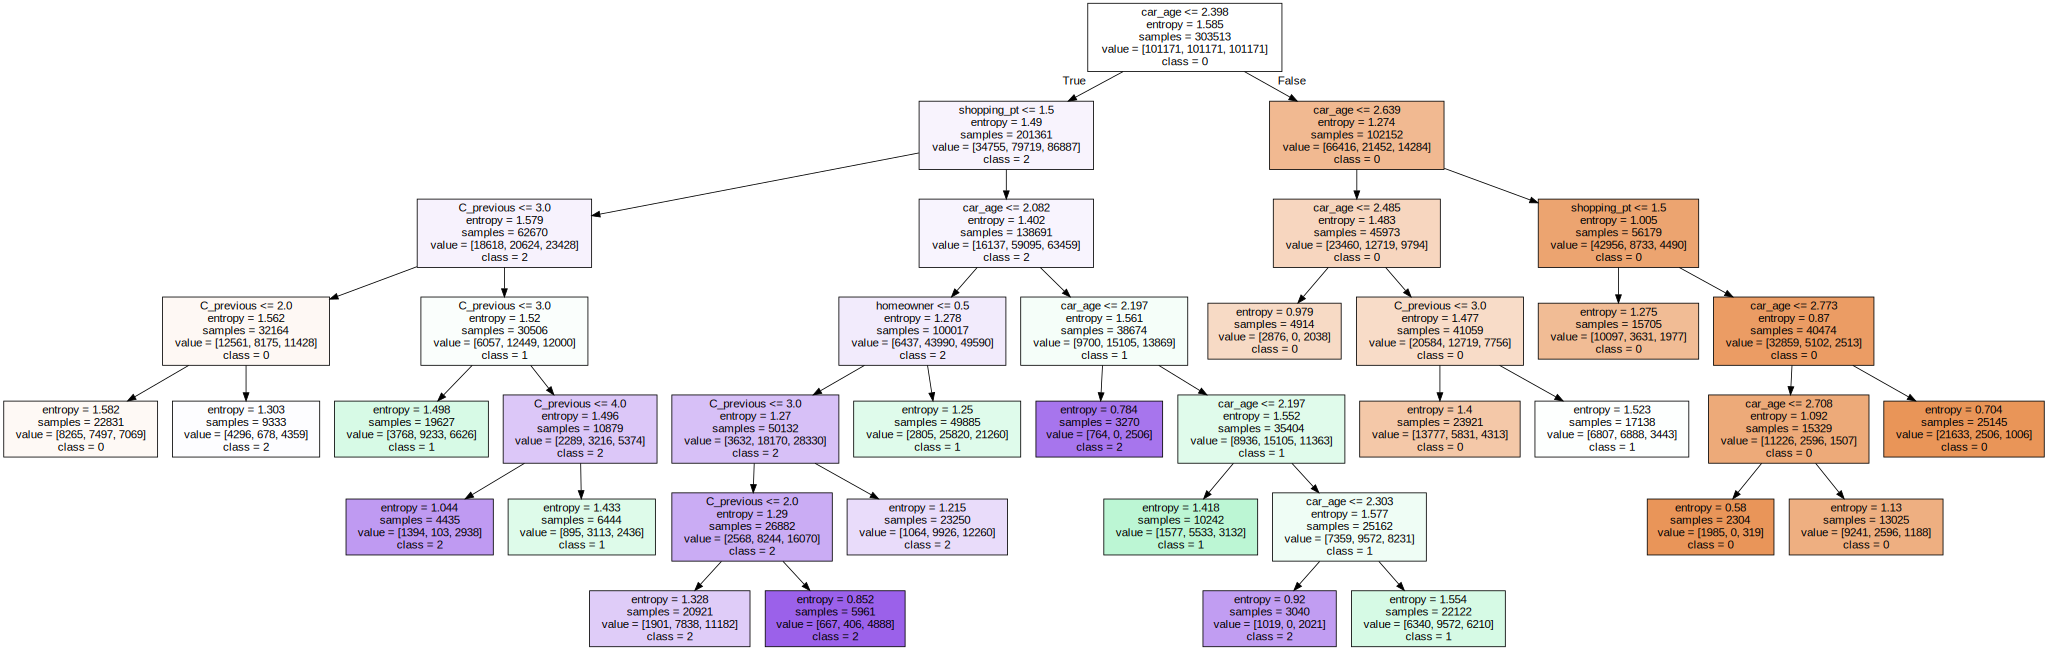

In [43]:
#tree plot
feature_names=features=['shopping_pt', 'day', 'location', 'group_size', 'homeowner', 'car_age',
       'risk_factor', 'age_oldest', 'age_youngest', 'married_couple',
       'C_previous', 'duration_previous', 'car_value', 'state']
target_name= ['0','1','2']
dot_data = tree.export_graphviz(model_dt2, out_file=None,  
                                feature_names=features,
                                class_names=target_name,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

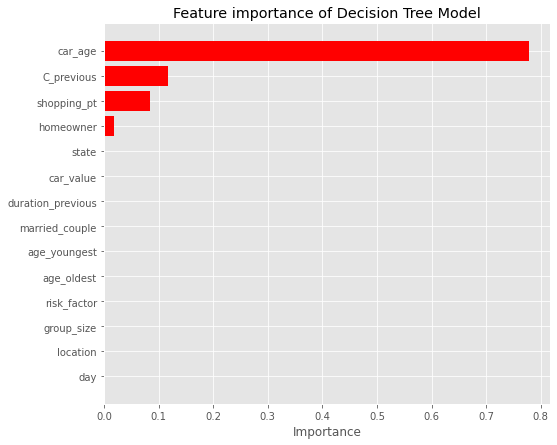

In [44]:
#feature importance graph for Decision Tree model
features_list1 = X2.columns.values
feature_importance1 = model_dt2.feature_importances_
sorted_idx1 = np.argsort(feature_importance1)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx1)), feature_importance1[sorted_idx1], align='center', color ="red")
plt.yticks(range(len(sorted_idx1)), features_list1[sorted_idx1])
plt.xlabel('Importance')
plt.title('Feature importance of Decision Tree Model')
plt.draw()
plt.show()

# Model- Random Forest

In [45]:
#Random Forest
rf=RandomForestClassifier(random_state=42)

#we use grid research to do get the best hyperparameters
params_rf = { 'n_estimators':[50, 100, 200],
        'max_features':['sqrt'],
        'max_depth': [3, 5, 7, 9, 11],
        'min_samples_leaf':[5,10,15,20],
        'min_samples_split': [10, 15,20]
}

#the grid search model of decision tree
model2 = GridSearchCV(estimator=rf, param_grid=params_rf, cv= 5,scoring='accuracy',n_jobs=-1)

In [46]:
%%time
model2.fit(X_train, y_train)

Wall time: 2min 52s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [47]:
model_rf=model2.best_estimator_
model_rf

RandomForestClassifier(max_depth=11, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [48]:
evaluate_model(model_rf)

Train Accuracy : 0.7837506136475209
Train Confusion Matrix:
[[3135  364  575]
 [ 432 3187  455]
 [ 390  427 3257]]
--------------------------------------------------
Test Accuracy : 0.6225
Test Confusion Matrix:
[[233 112  23]
 [163 716 139]
 [ 21 146  47]]


In [49]:
#deal with the overfitting
#1.reduce depth
model_rf2 = RandomForestClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10,n_estimators=50, random_state=42)

In [50]:
evaluate_model(model_rf2.fit(X_train, y_train))

Train Accuracy : 0.7277859597447226
Train Confusion Matrix:
[[2920  429  725]
 [ 510 2932  632]
 [ 465  566 3043]]
--------------------------------------------------
Test Accuracy : 0.603125
Test Confusion Matrix:
[[229 108  31]
 [163 683 172]
 [ 21 140  53]]


In [51]:
#2.use the whole dataset to train on big data and test the accuracy
model_rf3 = RandomForestClassifier(max_depth=11, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10,n_estimators=50, random_state=42)

In [52]:
%%time
model_rf3.fit(X_train2,y_train2)

Wall time: 19 s


RandomForestClassifier(max_depth=11, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [53]:
evaluate_model(model_rf3)

Train Accuracy : 0.6947308132875143
Train Confusion Matrix:
[[3019  389  666]
 [ 690 2600  784]
 [ 663  539 2872]]
--------------------------------------------------
Test Accuracy : 0.63375
Test Confusion Matrix:
[[257  78  33]
 [163 658 197]
 [ 24  91  99]]


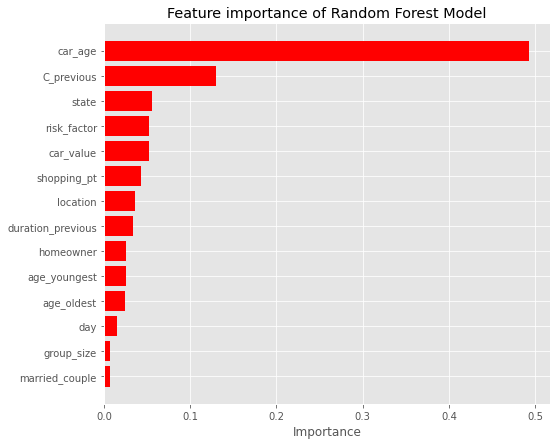

In [96]:
#feature importance graph for Random Forest model
features_list2 = X2.columns.values
feature_importance2 = model_rf3.feature_importances_
sorted_idx2 = np.argsort(feature_importance2)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx2)), feature_importance2[sorted_idx2], align='center', color ="red")
plt.yticks(range(len(sorted_idx2)), features_list2[sorted_idx2])
plt.xlabel('Importance')
plt.title('Feature importance of Random Forest Model')
plt.draw()
plt.show()

# Model- LightGBM

In [55]:
#light GBM
#lightGBM performs well when dealing with large data sets 
lgbm = lgb.LGBMClassifier(random_state=42)

#we use grid research to do get the best hyperparameters
params_lgbm = { 'n_estimators':[50, 100, 200],
        'max_depth': [3, 5, 7, 9, 11, 15], 
        'num_leaves':[20,30,40,50,70,90],
        'learning_rate':[0.005, 0.01,0.1, 0.3, 0.5]
}

#the grid search model of decision tree
grid_lgbm = GridSearchCV(estimator=lgbm, param_grid=params_lgbm, cv= 5,scoring = "neg_mean_squared_error",n_jobs=-1,verbose=1)

In [56]:
%%time
grid_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Wall time: 7min 58s


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 7, 9, 11, 15],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [20, 30, 40, 50, 70, 90]},
             scoring='neg_mean_squared_error', verbose=1)

In [57]:
#best parameters for random forest model
model_lgbm=grid_lgbm.best_estimator_
model_lgbm

LGBMClassifier(learning_rate=0.3, max_depth=15, n_estimators=200, num_leaves=90,
               random_state=42)

In [58]:
%%time
#accuracy and confusion matrix of train set and test set
evaluate_model(model_lgbm)

Train Accuracy : 1.0
Train Confusion Matrix:
[[4074    0    0]
 [   0 4074    0]
 [   0    0 4074]]
--------------------------------------------------
Test Accuracy : 0.700625
Test Confusion Matrix:
[[211 147  10]
 [ 95 881  42]
 [ 25 160  29]]
Wall time: 458 ms


In [59]:
#it is overfitting,so take some measures:
#1.add feature_fraction, Use bagging by set bagging_fraction and bagging_freq
params_lgbm2 = { 'n_estimators':[200],
        'max_depth': [15],
        'learning_rate':[0.3],
        'feature_fraction':[0.1,0.3,0.5,0.7,0.9],
        'bagging_fraction':[0.2,0.5,0.7,0.9],
        'bagging_freq':[5]
}

#the grid search model of decision tree
grid_lgbm2 = GridSearchCV(estimator=lgbm, param_grid=params_lgbm2, cv= 5,scoring = "neg_mean_squared_error",n_jobs=-1,verbose=1)

In [60]:
%%time
grid_lgbm2.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Wall time: 24.5 s


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'bagging_fraction': [0.2, 0.5, 0.7, 0.9],
                         'bagging_freq': [5],
                         'feature_fraction': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'learning_rate': [0.3], 'max_depth': [15],
                         'n_estimators': [200]},
             scoring='neg_mean_squared_error', verbose=1)

In [61]:
#best parameters for random forest model
model_lgbm2=grid_lgbm2.best_estimator_
model_lgbm2

LGBMClassifier(bagging_fraction=0.9, bagging_freq=5, feature_fraction=0.9,
               learning_rate=0.3, max_depth=15, n_estimators=200,
               random_state=42)

In [62]:
evaluate_model(model_lgbm2)

Train Accuracy : 0.9999181803305515
Train Confusion Matrix:
[[4074    0    0]
 [   0 4074    0]
 [   0    1 4073]]
--------------------------------------------------
Test Accuracy : 0.69375
Test Confusion Matrix:
[[213 140  15]
 [103 863  52]
 [ 17 163  34]]


In [63]:
#2. generalization lambda_l1, lambda_l2, min_gain_to_split(step 1 is not useful to change the result)
params_lgbm3 = { 'n_estimators':[200],
        'max_depth': [15],
        'learning_rate':[0.3],
        'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
        'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]   
}

#the grid search model of decision tree
grid_lgbm3 = GridSearchCV(estimator=lgbm, param_grid=params_lgbm3, cv= 5,scoring = "neg_mean_squared_error",n_jobs=-1,verbose=1)

In [64]:
%%time
grid_lgbm3.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Wall time: 1min 21s


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [15],
                         'n_estimators': [200],
                         'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
                         'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]},
             scoring='neg_mean_squared_error', verbose=1)

In [65]:
#best parameters for random forest model
model_lgbm3=grid_lgbm3.best_estimator_
model_lgbm3

LGBMClassifier(learning_rate=0.3, max_depth=15, n_estimators=200,
               random_state=42, reg_alpha=0, reg_lambda=0.001)

In [66]:
evaluate_model(model_lgbm3)

Train Accuracy : 0.9999181803305515
Train Confusion Matrix:
[[4073    1    0]
 [   0 4074    0]
 [   0    0 4074]]
--------------------------------------------------
Test Accuracy : 0.688125
Test Confusion Matrix:
[[205 152  11]
 [109 863  46]
 [ 18 163  33]]


In [67]:
#3. train on the whole big dataset
model_lgbm4= lgb.LGBMClassifier(learning_rate=0.3, max_depth=15, n_estimators=200,
               random_state=42, reg_alpha=0.08, reg_lambda=0.001)

In [68]:
%%time
model_lgbm4.fit(X_train2, y_train2)

Wall time: 4.81 s


LGBMClassifier(learning_rate=0.3, max_depth=15, n_estimators=200,
               random_state=42, reg_alpha=0.08, reg_lambda=0.001)

In [69]:
evaluate_model(model_lgbm4)

Train Accuracy : 0.7959417443953526
Train Confusion Matrix:
[[3187  370  517]
 [ 415 3452  207]
 [ 607  378 3089]]
--------------------------------------------------
Test Accuracy : 0.76625
Test Confusion Matrix:
[[255 100  13]
 [104 858  56]
 [ 11  90 113]]


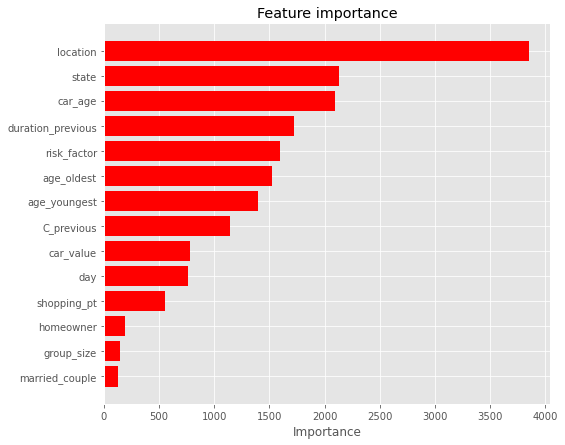

In [70]:
#feature importance graph for LGBM model
features_list3 = X.columns.values
feature_importance3 = model_lgbm4.feature_importances_
sorted_idx3 = np.argsort(feature_importance3)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx3)), feature_importance3[sorted_idx3], align='center', color ="red")
plt.yticks(range(len(sorted_idx3)), features_list3[sorted_idx3])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

# Model- XGBoost

In [71]:
#xgboost hyperparameter tuning
params = {'max_depth': [3, 5, 7, 9],
              'learning_rate': [0.005, 0.01, 0.1],
              'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
              'reg_alpha': [0, 0.5, 1],
              'reg_lambda': [0.5, 1, 5],
              'n_estimators': [50, 100, 250, 500],
              'num_class': [10]}

xgbclf= xgb.XGBClassifier(objective='multi:softmax',tree_method='hist')

clf = GridSearchCV(estimator=xgbclf,
                             param_grid=params,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             verbose=1)

In [72]:
%%time
clf.fit(X_train, y_train)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits
Wall time: 1h 14min 29s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None,
                                     

In [73]:
model_xg=clf.best_estimator_

In [74]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 500,
 'num_class': 10,
 'reg_alpha': 0,
 'reg_lambda': 0.5,
 'subsample': 0.7}

In [75]:
evaluate_model(model_xg)

Train Accuracy : 1.0
Train Confusion Matrix:
[[4074    0    0]
 [   0 4074    0]
 [   0    0 4074]]
--------------------------------------------------
Test Accuracy : 0.695625
Test Confusion Matrix:
[[210 147  11]
 [ 95 875  48]
 [ 19 167  28]]


In [76]:
#it's overfitting, so we need to take some measures:

#1. Reduce max_depth, Increase min_child_weight，increase gamma
params2 = {'learning_rate': [0.1],
         'max_depth': [3,5,7],
         'n_estimators': [500],
         'num_class': [10],
         'reg_alpha': [0],
         'reg_lambda': [5],
         'subsample': [0.7],
         'min_child_weight':[3,5,7,9,15],
           'gamma':[0.2, 0.3 ,0.4, 0.5, 1],
           
          }

clf2 = GridSearchCV(estimator=xgbclf,
                             param_grid=params2,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             verbose=1)


In [77]:
%%time
clf2.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Wall time: 3min 4s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None,
                                     

In [78]:
model_xg2=clf2.best_estimator_
model_xg2

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_class=10, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=0, ...)

In [79]:
clf2.best_params_

{'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 500,
 'num_class': 10,
 'reg_alpha': 0,
 'reg_lambda': 5,
 'subsample': 0.7}

In [80]:
evaluate_model(model_xg2)

Train Accuracy : 0.9972999509081983
Train Confusion Matrix:
[[4064    9    1]
 [   5 4066    3]
 [   1   14 4059]]
--------------------------------------------------
Test Accuracy : 0.680625
Test Confusion Matrix:
[[198 158  12]
 [111 857  50]
 [ 24 156  34]]


In [81]:
#2. add L1 alpha and colsample_bytree. and train on big dataset
params3 = {
         'max_depth': [7],
         'n_estimators': [500],
         'num_class': [10],
         'reg_alpha': [0],
         'reg_lambda': [5],
         'subsample': [0.7],
         'min_child_weight':[3],
           'gamma':[0.2],
           'alpha':[0.0001, 0.001,0.01,0.1,1,10],
           'colsample_bytree':[0.8]
          }

clf3 = GridSearchCV(estimator=xgbclf,
                             param_grid=params3,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             verbose=1)


In [82]:
%%time
clf3.fit(X_train2, y_train2)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Wall time: 7min 3s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             n_jobs=-1,
   

In [84]:
clf3.best_estimator_

XGBClassifier(alpha=0.0001, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_class=10, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', ...)

In [85]:
clf3.best_params_

{'alpha': 0.0001,
 'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 500,
 'num_class': 10,
 'reg_alpha': 0,
 'reg_lambda': 5,
 'subsample': 0.7}

In [86]:
model_xg3=clf3.best_estimator_
evaluate_model2(model_xg3)

Train Accuracy : 0.9320523338374304
Train Confusion Matrix:
[[93021  5734  2416]
 [ 4033 95100  2038]
 [ 1870  4532 94769]]
--------------------------------------------------
Test Accuracy : 0.8058699891108917
Test Confusion Matrix:
[[ 6160  2333   325]
 [ 1897 22648   929]
 [  365  1817  3015]]


In [87]:
#now, the optima accuracy is still not good, 
#we need to consider whether the learning rats is too low that lead to the local optimal solution

params4 = {
         'max_depth': [7],
         'n_estimators': [500],
         'num_class': [10],
         'reg_alpha': [0],
         'reg_lambda': [5],
         'subsample': [0.7],
         'min_child_weight':[3],
           'gamma':[0.2],
           'alpha':[0.0001],
           'colsample_bytree':[0.8],
            'learning_rate':[0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
          }

clf4 = GridSearchCV(estimator=xgbclf,
                             param_grid=params4,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             verbose=1)




In [88]:
%%time
clf4.fit(X_train2, y_train2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Wall time: 8min 4s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     objective='multi:softmax', predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0.0001], 'colsample_bytree': 

In [89]:
clf4.best_params_

{'alpha': 0.0001,
 'colsample_bytree': 0.8,
 'gamma': 0.2,
 'learning_rate': 0.9,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 500,
 'num_class': 10,
 'reg_alpha': 0,
 'reg_lambda': 5,
 'subsample': 0.7}

In [94]:
model_xg4=clf4.best_estimator_

In [95]:
%%time
evaluate_model2(model_xg4)

Train Accuracy : 0.9804720061414174
Train Confusion Matrix:
[[98893  1857   421]
 [ 1227 99122   822]
 [  309  1291 99571]]
--------------------------------------------------
Test Accuracy : 0.8312188204310061
Test Confusion Matrix:
[[ 6433  2055   330]
 [ 1751 22897   826]
 [  344  1359  3494]]
Wall time: 6.22 s


[14:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




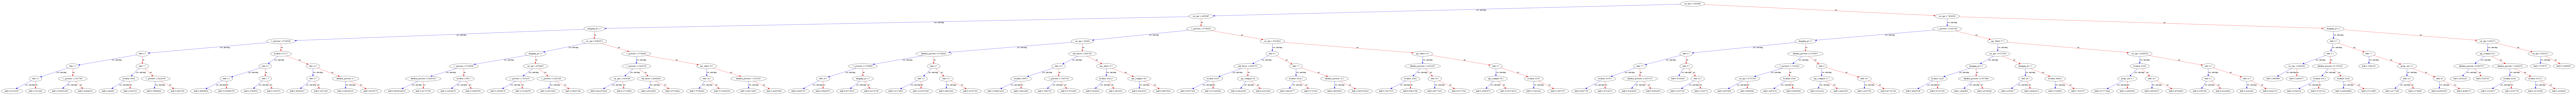

In [92]:
data_dmatrix = xgb.DMatrix(data=X2,label=y2)
xg_reg = xgb.train(params={'alpha': 0.0001,
 'colsample_bytree': 0.8,
 'gamma': 0.2,
 'learning_rate': 0.7,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 500,
 'num_class': 10,
 'reg_alpha': 0,
 'reg_lambda': 5,
 'subsample': 0.7}, dtrain=data_dmatrix, num_boost_round=10)

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 200]
plt.show()

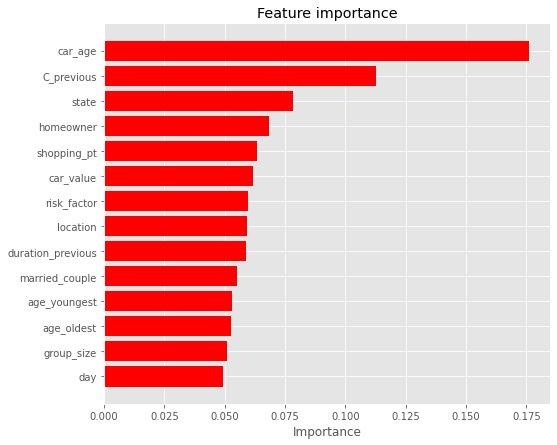

In [93]:
#feature importance graph for XGBoosting model
features_list = X2.columns.values
feature_importance = model_xg4.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

# conclusion: time and comparison

## Deision Tree

In [105]:
best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=20,
                       min_samples_leaf=200, random_state=42)

In [106]:
%%time
best_dt.fit(X_train2,y_train2)

Wall time: 1.3 s


DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=20,
                       min_samples_leaf=200, random_state=42)

In [107]:
%%time
evaluate_model(best_dt)

Train Accuracy : 0.5913925707740141
Train Confusion Matrix:
[[2771  744  559]
 [ 921 2345  808]
 [ 690 1272 2112]]
--------------------------------------------------
Test Accuracy : 0.573125
Test Confusion Matrix:
[[246 103  19]
 [212 617 189]
 [ 34 126  54]]
Wall time: 24.5 ms


In [108]:
# Cohen's Kappa Score
y_pred1 = best_dt.predict(X_test2)
cohen_kappa_score(y_test2, y_pred1)

0.22546489632858113

## Random Forest

In [109]:
best_rf = RandomForestClassifier(max_depth=11, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [110]:
%%time
best_rf.fit(X_train2,y_train2)

Wall time: 19.2 s


RandomForestClassifier(max_depth=11, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [111]:
%%time
evaluate_model(best_rf)

Train Accuracy : 0.6947308132875143
Train Confusion Matrix:
[[3019  389  666]
 [ 690 2600  784]
 [ 663  539 2872]]
--------------------------------------------------
Test Accuracy : 0.63375
Test Confusion Matrix:
[[257  78  33]
 [163 658 197]
 [ 24  91  99]]
Wall time: 730 ms


In [112]:
# Cohen's Kappa Score
y_pred2 = best_rf.predict(X_test2)
cohen_kappa_score(y_test2, y_pred2)

0.32467237381256475

# Logistic Regression

In [115]:
logreg = LogisticRegression()

In [116]:
%%time
logreg.fit(X_train2,y_train2)

Wall time: 12.4 s


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
%%time
evaluate_model(logreg)

Train Accuracy : 0.4676812305678285
Train Confusion Matrix:
[[2486 1099  489]
 [1242 1734 1098]
 [1204 1374 1496]]
--------------------------------------------------
Test Accuracy : 0.44125
Test Confusion Matrix:
[[200 107  61]
 [309 432 277]
 [ 58  82  74]]
Wall time: 25.9 ms


In [118]:
# Cohen's Kappa Score
y_pred3 = logreg.predict(X_test2)
cohen_kappa_score(y_test2, y_pred3)

0.11762070997960128

# xgboost

In [119]:
best_xg= xgb.XGBClassifier(objective='multi:softmax',tree_method='hist',alpha=0.0001,colsample_bytree=0.8,gamma=0.2,
                          learning_rate= 0.7,max_depth= 7,min_child_weight= 3,n_estimators= 500,num_class= 10,
                          reg_alpha= 0,reg_lambda=5,subsample=0.7)

In [120]:
%%time
best_xg.fit(X_train2,y_train2)

Wall time: 42.4 s


XGBClassifier(alpha=0.0001, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_class=10, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', ...)

In [121]:
%%time
evaluate_model(best_xg)

Train Accuracy : 0.8906071019473081
Train Confusion Matrix:
[[3556  168  350]
 [ 104 3904   66]
 [ 512  137 3425]]
--------------------------------------------------
Test Accuracy : 0.9225
Test Confusion Matrix:
[[322  40   6]
 [ 28 975  15]
 [  3  32 179]]
Wall time: 303 ms


In [122]:
# Cohen's Kappa Score
y_pred4 = best_rf.predict(X_test2)
cohen_kappa_score(y_test2, y_pred4)

0.32467237381256475

# lightGBM

In [123]:
best_lgbm= lgb.LGBMClassifier(learning_rate=0.3, max_depth=15, n_estimators=200,
               random_state=42, reg_alpha=0.08, reg_lambda=0.001)

In [124]:
%%time
best_lgbm.fit(X_train2,y_train2)

Wall time: 4.74 s


LGBMClassifier(learning_rate=0.3, max_depth=15, n_estimators=200,
               random_state=42, reg_alpha=0.08, reg_lambda=0.001)

In [125]:
%%time
evaluate_model(best_lgbm)

Train Accuracy : 0.7959417443953526
Train Confusion Matrix:
[[3187  370  517]
 [ 415 3452  207]
 [ 607  378 3089]]
--------------------------------------------------
Test Accuracy : 0.76625
Test Confusion Matrix:
[[255 100  13]
 [104 858  56]
 [ 11  90 113]]
Wall time: 272 ms


In [126]:
# Cohen's Kappa Score
y_pred5 = best_lgbm.predict(X_test2)
cohen_kappa_score(y_test2, y_pred5)

0.4896525772849636